## UEPB Sistemas Multimídia Noite. Aluno: Franklin da Silva Basilio 121086577

# Conversão do algoritmo de compressão JPEG (matlab para python)
## http://pi.math.cornell.edu/~web6140/TopTenAlgorithms/JPEG.html


### Requisitos:
**Python 3.7.9**<br>
**Scipy:** `pip install opencv-python==1.5.4`<br>
**OpenCV:** `pip install opencv-python==3.4.2.17`<br>
**Numpy:** `pip install numpy==1.15.0`<br>
**Matplotlib:** `pip install matplotlib==3.3.3`<br>


In [44]:
import cv2
import scipy
import numpy as np
from numpy import r_
from matplotlib import pyplot as plt
%matplotlib inline

# Leitura da imagem não-compactada e exibição

In [45]:
BGR_image = cv2.imread('peppers.png', cv2.IMREAD_COLOR)
RGB_image = cv2.cvtColor(BGR_image, cv2.COLOR_BGR2RGB)

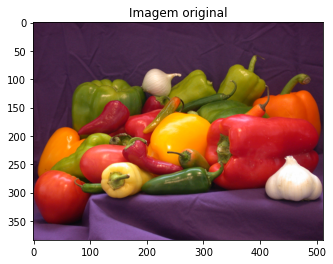

In [46]:
plt.imshow(RGB_image)
plt.title('Imagem original')
plt.show()

In [47]:
width, height, depth = RGB_image.shape

print("Tamanho da imagem: {} bits".format(width*height*depth*8))

Tamanho da imagem: 4718592 bits



# Convertendo a imagem RGB em YCrCb

Para o procedimento de compressão **JPEG** é necessário que a imagem esteja codificada em YCrCb.


In [48]:
YCrCb_image = cv2.cvtColor(RGB_image, cv2.COLOR_RGB2YCrCb)



# Reamostrando a imagem em CrCb

Podemos verificar que, ao reamostrar a imagem com uma definição 10 vezes menor para os canais ***Cr*** e ***Cb***, não conseguimos perceber diferenças entre as imagens original e reamostrada.

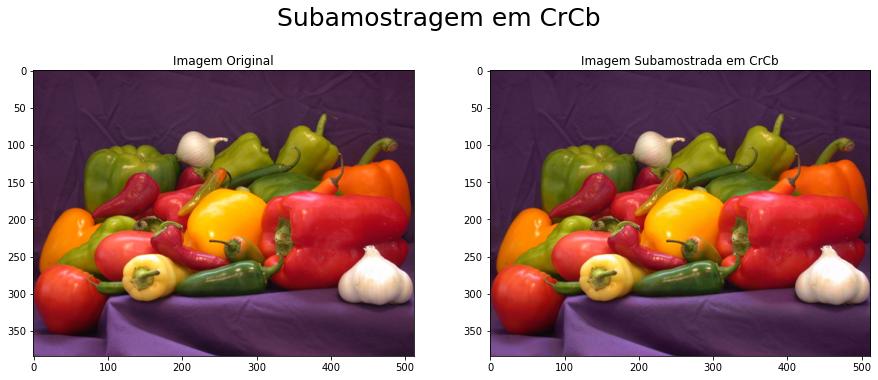

In [49]:
YCrCb_down_cr_cb = np.array(YCrCb_image)
YCrCb_down_cr_cb[ : , : ,1] = np.round(YCrCb_down_cr_cb[ : , : ,1] / 10)*10
YCrCb_down_cr_cb[ : , : ,2] = np.round(YCrCb_down_cr_cb[ : , : ,2] / 10)*10

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

fig.suptitle('Subamostragem em CrCb', fontsize=25)

ax1.title.set_text('Imagem Original')
ax1.imshow(RGB_image)

ax2.title.set_text('Imagem Subamostrada em CrCb')
ax2.imshow(cv2.cvtColor(YCrCb_down_cr_cb, cv2.COLOR_YCrCb2RGB))

plt.show()


# Reamostrando a imagem em Y

Como o olho humano é mais sensível à mudança de luminosidade, podemos notar uma perda de qualidade maior ao subamostrar a imagem no canal Y.

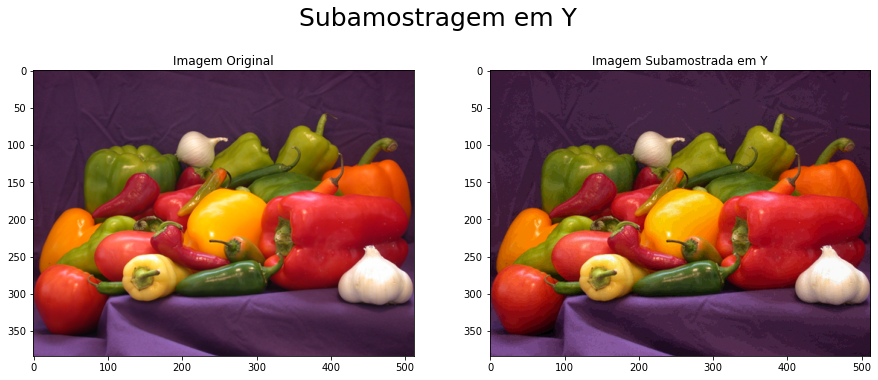

In [50]:
YCrCb_down_y = np.array(YCrCb_image)
YCrCb_down_y[ : , : ,0] = (np.floor(YCrCb_down_y[ : , : ,0] / 10))*10

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

fig.suptitle('Subamostragem em Y', fontsize=25)

ax1.title.set_text('Imagem Original')
ax1.imshow(RGB_image)

ax2.title.set_text('Imagem Subamostrada em Y')
ax2.imshow(cv2.cvtColor(YCrCb_down_y, cv2.COLOR_YCrCb2RGB))

plt.show()


In [51]:
def resample_image(ycbcr_image, factor):
    ressampled = np.array(ycbcr_image)
    
    ressampled[:,:,1] = factor * np.round(ressampled[:,:,1] / factor)
    ressampled[:,:,2] = factor * np.round(ressampled[:,:,2] / factor)
    
    return ressampled

def dct2(a):
    return scipy.fft.dct( scipy.fft.dct( a, axis=0), axis=1)

def idct2(a):
    return scipy.fft.idct( scipy.fft.idct( a, axis=0), axis=1)

Q_matrix = [
     [16, 11, 10, 16, 24, 40, 51, 61],
     [12, 12, 14, 19, 26, 28, 60, 55],
     [14, 13, 16, 24, 40, 57, 69, 56],
     [14, 17, 22, 29, 51, 87, 80, 62],
     [18, 22, 37, 56, 68, 109, 103, 77],
     [24, 35, 55, 64, 81, 104, 113, 92],
     [49, 64, 78, 87, 103, 121, 120, 101],
     [72, 92, 95, 98, 112, 100, 103, 99]]

Text(0.5, 1.0, 'Imagem reamostrada por um fator 16')

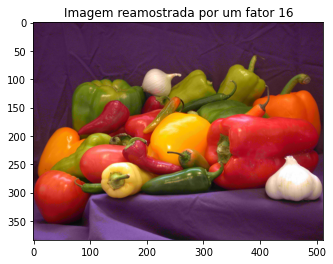

In [52]:
img2 = resample_image(YCrCb_image, 16)

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_YCrCb2RGB))
plt.title("Imagem reamostrada por um fator 16")

# Compressão JPEG

In [53]:
img = cv2.imread('peppers.png')
img_Y = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

# Downsample
img_Y_r = resample_image(img_Y, 2)

# DCT Compress
A = np.array(img)
B = np.array(img)

height, width, depth = img_Y.shape

for channel in range(3):
    for l in range(0, height, 8):
        for c in range(0, width, 8):
            II = img_Y[l: l+8,c: c+8 ,channel]
            
            freq = dct2(II)
            freq = Q_matrix * np.round(freq / Q_matrix)
            
            A[l:l+8, c:c+8, channel] = freq
            B[l:l+8, c:c+8, channel] = idct2(freq)


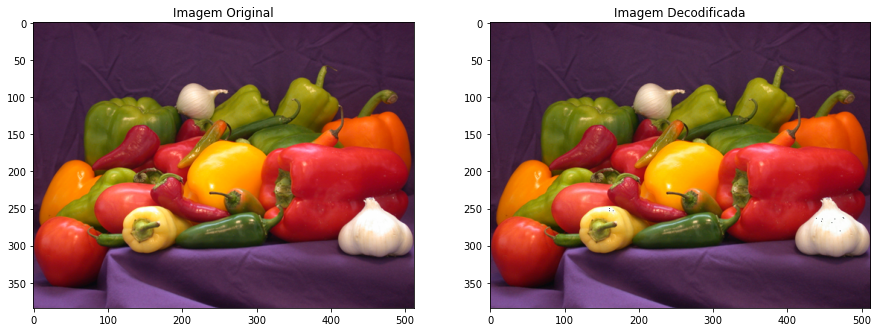

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.title.set_text('Imagem Original')
ax1.imshow(RGB_image)

ax2.title.set_text('Imagem Decodificada')
ax2.imshow(cv2.cvtColor(B, cv2.COLOR_YCrCb2RGB))

plt.show()

In [55]:
original_size = RGB_image.size*8 # Tamanho em bits
compressed_size = 8*np.count_nonzero(A[:,:,0]) + 7*np.count_nonzero(A[:,:,1]) + 7*np.count_nonzero(A[:,:,2])
compress_rate = compressed_size / original_size

print(f'Taxa de Compressao: {compress_rate}')

Taxa de Compressao: 0.33891211615668404
